In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#getting tables columns using the inspector function
inspector = inspect(engine) 
inspector.get_table_names()

['measurement', 'station']

In [150]:

Columns = inspector.get_columns('measurement')
for column in Columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


Text(0.5, 0, 'Date')

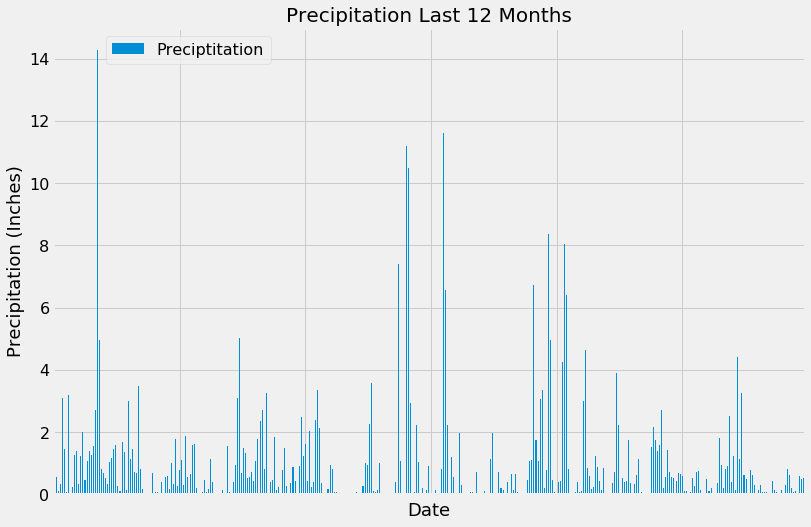

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#pulling data from session
fartherst_date = session.query(Measure.date).order_by(Measure.date.desc()).first()

#calculating latest date in the data farme 
latest_date = fartherst_date[0]
one_year_back = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_back

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
last_12months = session.query(Measure.date, Measure.prcp).filter(Measure.date > one_year_back).all()
last_12months

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12months, columns = ["Date","Preciptitation"])

# Sort the dataframe by date
grouped_date = df.groupby(["Date"]).sum()

# Use Pandas Plotting with Matplotlib to plot the data
multi_plot = grouped_date.plot(kind="bar", figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
multi_plot.xaxis.set_major_formatter(plt.NullFormatter())
multi_plot.tick_params(axis='y', labelsize=16)
multi_plot.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)

In [55]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df["Preciptitation"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Preciptitation, dtype: float64

In [100]:
# Design a query to show how many stations are available in this dataset?
station_count  = session.query(func.count(Station.name)).all()

station_count

[(9)]

In [110]:
# What are the most active stations? (i.e. what stations have the most rows)?
station = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
        order_by(func.count(Measure.station).desc()).limit(3).all()

station

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709)]

In [111]:
# List the stations and the counts in descending order.
station = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
        order_by(func.count(Measure.station).desc()).all()

station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
USC00519281_lowest_temp = session.query(func.min(Measure.prcp)).filter(Measure.station == 'USC00519281').all()

USC00519281_lowest_temp

In [118]:
# highest temperature recorded, and average temperature of the most active station?
USC00519281_highest_temp = session.query(func.max(Measure.prcp)).filter(Measure.station == 'USC00519281').all()

USC00519281_highest_temp

[(9.64)]

In [119]:
#average temperature of the most active station?
USC00519281_avg_temp = session.query(func.avg(Measure.prcp)).filter(Measure.station == 'USC00519281').all()

USC00519281_avg_temp

[(0.2123520923520915)]

In [149]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#pulling data from session
fartherst_date = session.query(Measure.date).filter(Measure.station == 'USC00519281').order_by(Measure.date.desc()).first()

#calculating latest date in the data farme 
latest_date = fartherst_date[0]
one_year_back = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_back

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
last_12months = session.query(Measure.station, Measure.prcp).filter(Measure.station == 'USC00519281').\
                filter(Measure.date > one_year_back).all()
last_12months

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12months, columns = ["Station","Precipitation"])

#Sort the dataframe by date
grouped_temp = df.groupby(["Precipitation"]).count()
grouped_temp

,Station
Precipitation,
0.00,102
0.01,28
0.02,16
0.03,15
0.04,5
...,...
2.15,1
2.30,1
2.32,1
